In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [21]:
#read data
df = pd.read_csv("./housing.csv")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2413 entries, 0 to 2412
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Lot_Frontage   2413 non-null   int64  
 1   Lot_Area       2413 non-null   int64  
 2   Bldg_Type      2413 non-null   object 
 3   House_Style    2413 non-null   object 
 4   Overall_Cond   2413 non-null   object 
 5   Year_Built     2413 non-null   int64  
 6   Exter_Cond     2413 non-null   object 
 7   Total_Bsmt_SF  2413 non-null   int64  
 8   First_Flr_SF   2413 non-null   int64  
 9   Second_Flr_SF  2413 non-null   int64  
 10  Full_Bath      2413 non-null   int64  
 11  Half_Bath      2413 non-null   int64  
 12  Bedroom_AbvGr  2413 non-null   int64  
 13  Kitchen_AbvGr  2413 non-null   int64  
 14  Fireplaces     2413 non-null   int64  
 15  Longitude      2413 non-null   float64
 16  Latitude       2413 non-null   float64
 17  Sale_Price     2413 non-null   int64  
dtypes: float

In [23]:
# null value check
df.isnull().sum()

Lot_Frontage     0
Lot_Area         0
Bldg_Type        0
House_Style      0
Overall_Cond     0
Year_Built       0
Exter_Cond       0
Total_Bsmt_SF    0
First_Flr_SF     0
Second_Flr_SF    0
Full_Bath        0
Half_Bath        0
Bedroom_AbvGr    0
Kitchen_AbvGr    0
Fireplaces       0
Longitude        0
Latitude         0
Sale_Price       0
dtype: int64

In [24]:
#duplicated value check
df.drop_duplicates()

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
0,141,31770,OneFam,One_Story,Average,1960,Typical,1080,1656,0,1,0,3,1,2,-93.619754,42.054035,215000
1,80,11622,OneFam,One_Story,Above_Average,1961,Typical,882,896,0,1,0,2,1,0,-93.619756,42.053014,105000
2,81,14267,OneFam,One_Story,Above_Average,1958,Typical,1329,1329,0,1,1,3,1,0,-93.619387,42.052659,172000
3,93,11160,OneFam,One_Story,Average,1968,Typical,2110,2110,0,2,1,3,1,2,-93.617320,42.051245,244000
4,74,13830,OneFam,Two_Story,Average,1997,Typical,928,928,701,2,1,3,1,1,-93.638933,42.060899,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,37,7937,OneFam,SLvl,Above_Average,1984,Typical,1003,1003,0,1,0,3,1,0,-93.604776,41.988964,142500
2409,0,8885,OneFam,One_Story,Average,1983,Typical,864,902,0,1,0,2,1,0,-93.602680,41.988314,131000
2410,62,10441,OneFam,SFoyer,Average,1992,Typical,912,970,0,1,0,3,1,0,-93.606847,41.986510,132000
2411,77,10010,OneFam,One_Story,Average,1974,Typical,1389,1389,0,1,0,2,1,1,-93.600190,41.990921,170000


In [25]:
#seperated numerical and categorical values
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

numerical = df[numeric_cols]
categorical = df[categorical_cols]

In [26]:
#description of numerical data
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
Lot_Frontage,2413.0,55.462495,33.542416,0.000000,37.000000,60.000000,77.000000,313.000000
Lot_Area,2413.0,10060.208040,8222.759854,1300.000000,7390.000000,9360.000000,11404.000000,215245.000000
Year_Built,2413.0,1969.436386,29.487943,1872.000000,1953.000000,1971.000000,1998.000000,2010.000000
Total_Bsmt_SF,2413.0,1022.827600,408.977848,0.000000,784.000000,970.000000,1246.000000,3206.000000
First_Flr_SF,2413.0,1133.857024,366.442470,334.000000,866.000000,1060.000000,1350.000000,3820.000000
Second_Flr_SF,2413.0,339.242851,423.198488,0.000000,0.000000,0.000000,704.000000,1872.000000
Full_Bath,2413.0,1.539163,0.544667,0.000000,1.000000,2.000000,2.000000,4.000000
Half_Bath,2413.0,0.377953,0.498467,0.000000,0.000000,0.000000,1.000000,2.000000
Bedroom_AbvGr,2413.0,2.854538,0.813430,0.000000,2.000000,3.000000,3.000000,6.000000
Kitchen_AbvGr,2413.0,1.040199,0.200642,0.000000,1.000000,1.000000,1.000000,3.000000


<AxesSubplot:xlabel='Year_Built', ylabel='Count'>

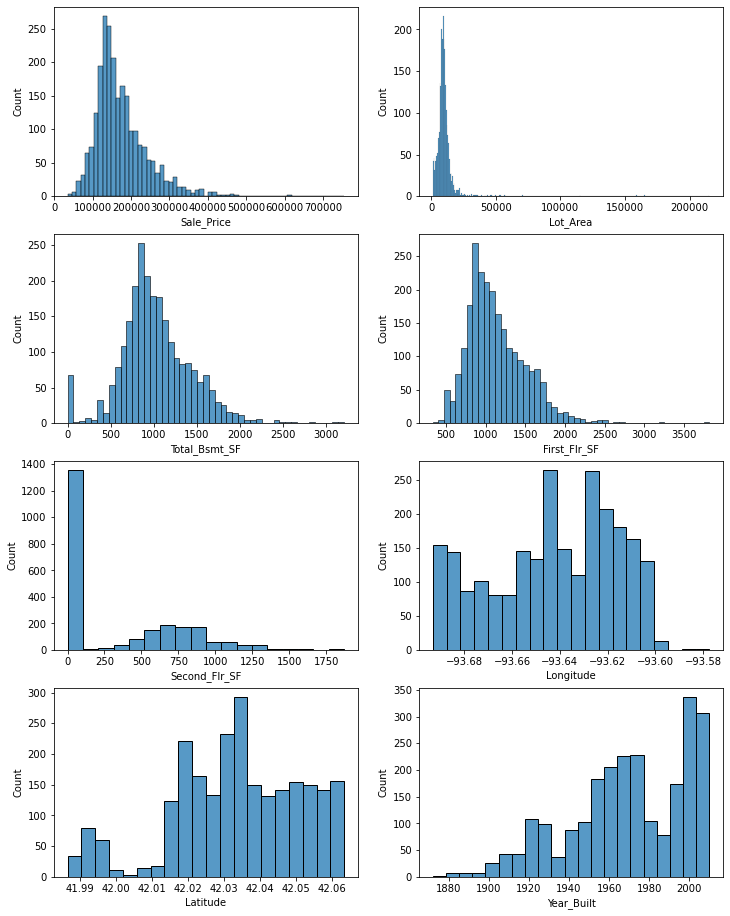

In [27]:
#distribution of a few columns
fig, ax2 = plt.subplots(4, 2, figsize=(12, 16))
sb.histplot(df['Lot_Area'],ax=ax2[0][1])
sb.histplot(df['Total_Bsmt_SF'],ax=ax2[1][0])
sb.histplot(df['First_Flr_SF'],ax=ax2[1][1])
sb.histplot(df['Second_Flr_SF'],ax=ax2[2][0])
sb.histplot(df['Longitude'],ax=ax2[2][1])
sb.histplot(df['Latitude'],ax=ax2[3][0])
sb.histplot(df['Sale_Price'],ax=ax2[0][0])
sb.histplot(df["Year_Built"],ax=ax2[3][1])


# Encoding

In [28]:
#encoding for categorical columns
label_encoding = preprocessing.LabelEncoder()

for column in categorical:
    df[column]=label_encoding.fit_transform(df[column])
    
df

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
0,141,31770,1,0,1,1960,4,1080,1656,0,1,0,3,1,2,-93.619754,42.054035,215000
1,80,11622,1,0,0,1961,4,882,896,0,1,0,2,1,0,-93.619756,42.053014,105000
2,81,14267,1,0,0,1958,4,1329,1329,0,1,1,3,1,0,-93.619387,42.052659,172000
3,93,11160,1,0,1,1968,4,2110,2110,0,2,1,3,1,2,-93.617320,42.051245,244000
4,74,13830,1,5,1,1997,4,928,928,701,2,1,3,1,1,-93.638933,42.060899,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,37,7937,1,4,0,1984,4,1003,1003,0,1,0,3,1,0,-93.604776,41.988964,142500
2409,0,8885,1,0,1,1983,4,864,902,0,1,0,2,1,0,-93.602680,41.988314,131000
2410,62,10441,1,3,1,1992,4,912,970,0,1,0,3,1,0,-93.606847,41.986510,132000
2411,77,10010,1,0,1,1974,4,1389,1389,0,1,0,2,1,1,-93.600190,41.990921,170000


## Descriptive Statistics

In [29]:
descriptive = df.agg([ 'std', 'median','skew', 'kurt', 'var','mean']).T
descriptive

,std,median,skew,kurt,var,mean
Lot_Frontage,33.542416,60.000000,-0.081114,1.165690,1.125094e+03,55.462495
Lot_Area,8222.759854,9360.000000,13.393921,270.466068,6.761378e+07,10060.208040
Bldg_Type,0.724769,1.000000,2.216017,4.754053,5.252907e-01,1.226689
House_Style,2.297462,1.000000,0.498645,-1.568070,5.278332e+00,1.983423
Overall_Cond,2.052782,1.000000,1.309029,0.365022,4.213912e+00,1.864898
Year_Built,29.487943,1971.000000,-0.586724,-0.438653,8.695388e+02,1969.436386
Exter_Cond,0.786995,4.000000,-2.406885,4.640708,6.193611e-01,3.694571
Total_Bsmt_SF,408.977848,970.000000,0.456386,1.716119,1.672629e+05,1022.827600
First_Flr_SF,366.442470,1060.000000,1.043301,2.256534,1.342801e+05,1133.857024
Second_Flr_SF,423.198488,0.000000,0.804118,-0.559404,1.790970e+05,339.242851


# Correlation

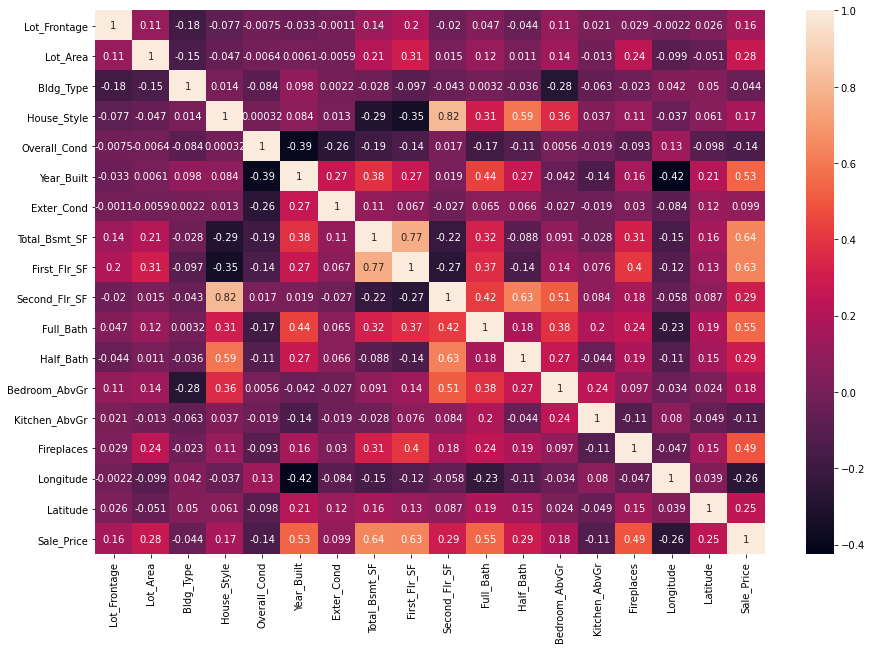

In [30]:
corr_= df.corr()
plt.figure(figsize=(15,10))
sb.heatmap(corr_, annot=True,)

plt.show()

# Scaling

In [31]:
scale = StandardScaler()
scaled_df=df.copy()
scaled_df[['Longitude','Latitude','Total_Bsmt_SF','First_Flr_SF','Second_Flr_SF']] = scale.fit_transform(scaled_df[['Longitude', 'Latitude','Total_Bsmt_SF','First_Flr_SF','Second_Flr_SF']])

scaled_df

,Lot_Frontage,Lot_Area,Bldg_Type,House_Style,Overall_Cond,Year_Built,Exter_Cond,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Fireplaces,Longitude,Latitude,Sale_Price
0,141,31770,1,0,1,1960,4,0.139822,1.425193,-0.801783,1,0,3,1,2,0.865553,1.127316,215000
1,80,11622,1,0,0,1961,4,-0.344412,-0.649232,-0.801783,1,0,2,1,0,0.865476,1.070631,105000
2,81,14267,1,0,0,1958,4,0.748783,0.532644,-0.801783,1,1,3,1,0,0.879574,1.050921,172000
3,93,11160,1,0,1,1968,4,2.658818,2.664389,-0.801783,2,1,3,1,2,0.958620,0.972416,244000
4,74,13830,1,5,1,1997,4,-0.231913,-0.561888,0.854994,2,1,3,1,1,0.132217,1.508405,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,37,7937,1,4,0,1984,4,-0.048491,-0.357175,-0.801783,1,0,3,1,0,1.438258,-2.485417,142500
2409,0,8885,1,0,1,1983,4,-0.388433,-0.632855,-0.801783,1,0,2,1,0,1.518401,-2.521505,131000
2410,62,10441,1,3,1,1992,4,-0.271043,-0.447249,-0.801783,1,0,3,1,0,1.359070,-2.621663,132000
2411,77,10010,1,0,1,1974,4,0.895521,0.696415,-0.801783,1,0,2,1,1,1.613610,-2.376765,170000


## Log Transformation 

In [32]:
#Log tranformation of Sale_Price,Lot_Area
df_transformed = scaled_df.copy()
df_transformed['Sale_Price'] = np.log(df_transformed['Sale_Price'])
df_transformed['Lot_Area'] = np.log(df_transformed['Lot_Area'])

In [33]:
descriptive = df_transformed.agg([ 'std', 'median','skew', 'kurt', 'var','mean']).T
descriptive

,std,median,skew,kurt,var,mean
Lot_Frontage,33.542416,60.000000,-0.081114,1.165690,1125.093638,5.546249e+01
Lot_Area,0.516554,9.144201,-0.513715,3.793191,0.266828,9.079985e+00
Bldg_Type,0.724769,1.000000,2.216017,4.754053,0.525291,1.226689e+00
House_Style,2.297462,1.000000,0.498645,-1.568070,5.278332,1.983423e+00
Overall_Cond,2.052782,1.000000,1.309029,0.365022,4.213912,1.864898e+00
Year_Built,29.487943,1971.000000,-0.586724,-0.438653,869.538758,1.969436e+03
Exter_Cond,0.786995,4.000000,-2.406885,4.640708,0.619361,3.694571e+00
Total_Bsmt_SF,1.000207,-0.129197,0.456386,1.716119,1.000415,3.723020e-16
First_Flr_SF,1.000207,-0.201593,1.043301,2.256534,1.000415,-1.394105e-17
Second_Flr_SF,1.000207,-0.801783,0.804118,-0.559404,1.000415,8.705106e-17


<AxesSubplot:xlabel='Year_Built', ylabel='Count'>

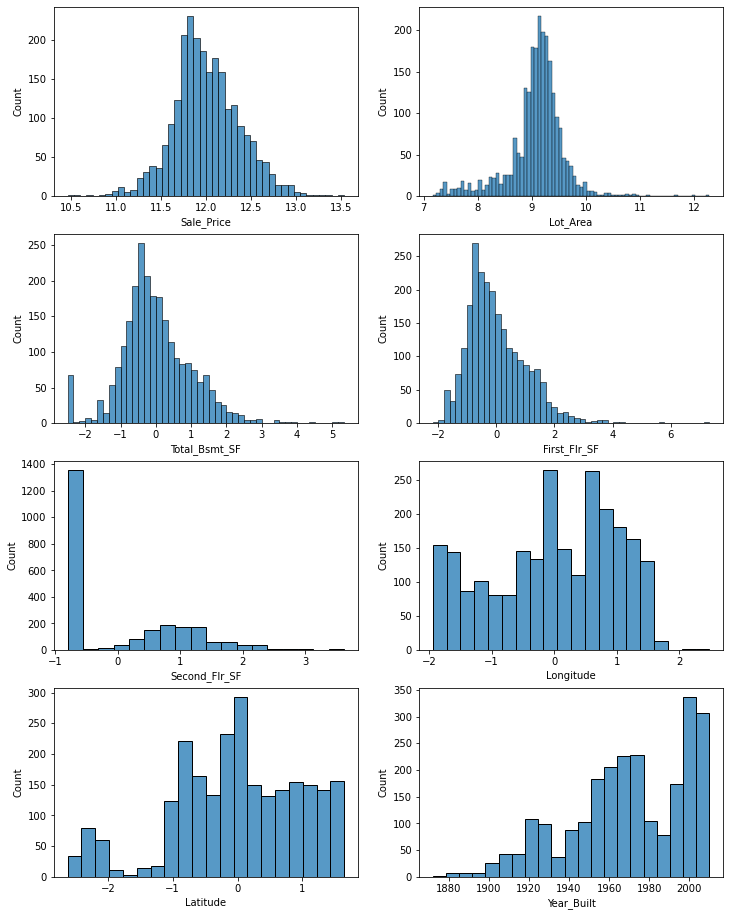

In [34]:
fig, ax2 = plt.subplots(4, 2, figsize=(12, 16))
sb.histplot(df_transformed['Lot_Area'],ax=ax2[0][1])
sb.histplot(df_transformed['Total_Bsmt_SF'],ax=ax2[1][0])
sb.histplot(df_transformed['First_Flr_SF'],ax=ax2[1][1])
sb.histplot(df_transformed['Second_Flr_SF'],ax=ax2[2][0])
sb.histplot(df_transformed['Longitude'],ax=ax2[2][1])
sb.histplot(df_transformed['Latitude'],ax=ax2[3][0])
sb.histplot(df_transformed['Sale_Price'],ax=ax2[0][0])
sb.histplot(df_transformed["Year_Built"],ax=ax2[3][1])


## Model 1

### Split Data

In [35]:
#split data
X = df.drop("Sale_Price", axis=1)
y = df['Sale_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23136235)

In [36]:
X = sm.add_constant(X)

# Fit the model with the specified seed

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Fit the OLS model on the training set
model = sm.OLS(y_train, X_train_const).fit()



# Print the summary
print(model.summary())


summary_html = model.summary().tables[1].as_html()

# Convert the HTML table to a DataFrame
summary_df = pd.read_html(summary_html, header=0, index_col=0)[0]

# Export the DataFrame to Excel
summary_df.to_excel('ols_summary_1.xlsx')

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     568.7
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        02:17:43   Log-Likelihood:                -22550.
No. Observations:                1930   AIC:                         4.514e+04
Df Residuals:                    1912   BIC:                         4.524e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.148e+07   3.34e+06     -3.433

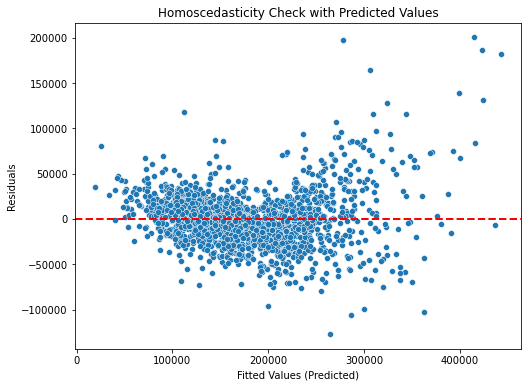

In [37]:
residuals = model.resid
fitted_values = model.fittedvalues

# Scatter plot of residuals vs. fitted values with predicted values
plt.figure(figsize=(8, 6))
sb.scatterplot(x=model.predict(), y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  
plt.xlabel('Fitted Values (Predicted)')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check with Predicted Values')
plt.show()


In [38]:
# Cook's distance
influence = OLSInfluence(model)
cook_distance = influence.cooks_distance

print(f'Max Cook\'s Distance: {cook_distance[0].max()}')

Max Cook's Distance: 0.06416730430838814


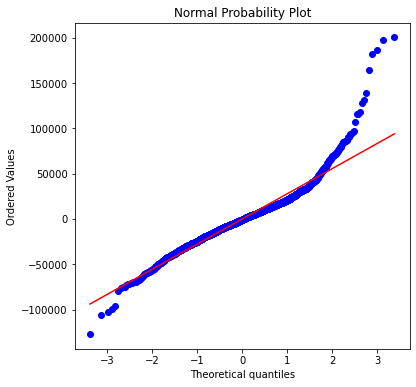

In [39]:
fig, ax = plt.subplots(figsize=(6, 6))
stats.probplot(residuals, plot=ax, fit=True)
plt.title('Normal Probability Plot')
plt.show()



In [40]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


         Variable           VIF
0           const  2.512948e+07
1    Lot_Frontage  1.086177e+00
2        Lot_Area  1.180358e+00
3       Bldg_Type  1.167856e+00
4     House_Style  3.447336e+00
5    Overall_Cond  1.240932e+00
6      Year_Built  2.491767e+00
7      Exter_Cond  1.125112e+00
8   Total_Bsmt_SF  2.730441e+00
9    First_Flr_SF  3.747843e+00
10  Second_Flr_SF  5.309648e+00
11      Full_Bath  2.561830e+00
12      Half_Bath  2.215438e+00
13  Bedroom_AbvGr  1.800343e+00
14  Kitchen_AbvGr  1.203463e+00
15     Fireplaces  1.456803e+00
16      Longitude  1.287750e+00
17       Latitude  1.130605e+00


## Model 2


In [41]:
df_model_1=df_transformed.copy()

### Split Data

In [42]:
X = df_model_1.drop("Sale_Price", axis=1)
y = df_model_1['Sale_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23136235)

In [43]:
X = sm.add_constant(X)

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Fit the OLS model on the training set
model = sm.OLS(y_train, X_train_const).fit()


# Print the summary
print(model.summary())


summary_html = model.summary().tables[1].as_html()

# Convert the HTML table to a DataFrame
summary_df = pd.read_html(summary_html, header=0, index_col=0)[0]

# Export the DataFrame to Excel
summary_df.to_excel('ols_summary_2.xlsx')

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     663.1
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        02:17:44   Log-Likelihood:                 1023.1
No. Observations:                1930   AIC:                            -2010.
Df Residuals:                    1912   BIC:                            -1910.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.6740      0.359      7.449

In [44]:
# Cook's distance
influence = OLSInfluence(model)
cook_distance = influence.cooks_distance

print(f'Max Cook\'s Distance: {cook_distance[0].max()}')

Max Cook's Distance: 0.03475823625536569


In [45]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


         Variable           VIF
0           const  12011.956060
1    Lot_Frontage      1.109896
2        Lot_Area      1.716960
3       Bldg_Type      1.329818
4     House_Style      3.456261
5    Overall_Cond      1.241390
6      Year_Built      2.501859
7      Exter_Cond      1.127080
8   Total_Bsmt_SF      2.731228
9    First_Flr_SF      3.905074
10  Second_Flr_SF      5.321891
11      Full_Bath      2.563133
12      Half_Bath      2.215172
13  Bedroom_AbvGr      1.814772
14  Kitchen_AbvGr      1.204353
15     Fireplaces      1.459311
16      Longitude      1.319398
17       Latitude      1.122637


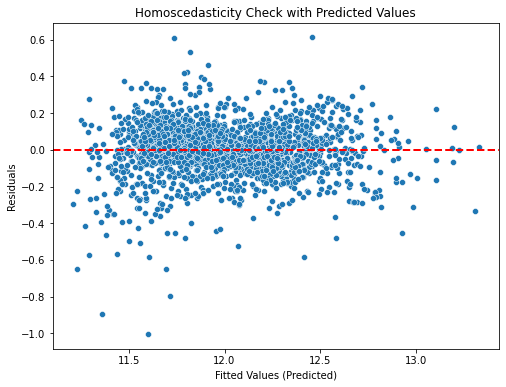

In [46]:
residuals = model.resid
fitted_values = model.fittedvalues

# Scatter plot of residuals vs. fitted values with predicted values
plt.figure(figsize=(8, 6))
sb.scatterplot(x=model.predict(), y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  
plt.xlabel('Fitted Values (Predicted)')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check with Predicted Values')
plt.show()

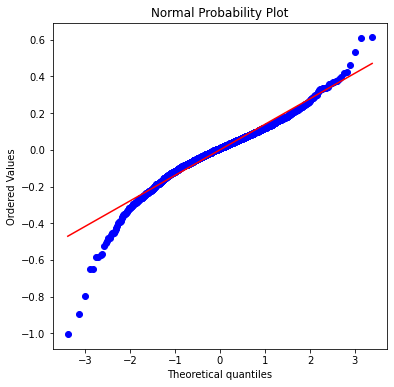

In [47]:
fig, ax = plt.subplots(figsize=(6, 6))
stats.probplot(residuals, plot=ax, fit=True)
plt.title('Normal Probability Plot')
plt.show()

## Model 3


In [48]:
df_model=df_transformed.copy()
df_dropped_columns = df_model.drop(["Lot_Frontage","Second_Flr_SF","Bedroom_AbvGr","Kitchen_AbvGr","Bldg_Type","House_Style","Exter_Cond","First_Flr_SF"],axis=1)


In [49]:
X = df_dropped_columns.drop("Sale_Price", axis=1)
y = df_dropped_columns['Sale_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23136235)
X = sm.add_constant(X)

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Fit the OLS model on the training set
model = sm.OLS(y_train, X_train_const).fit()


# Print the summary
print(model.summary())


summary_html = model.summary().tables[1].as_html()

# Convert the HTML table to a DataFrame
summary_df = pd.read_html(summary_html, header=0, index_col=0)[0]

# Export the DataFrame to Excel
summary_df.to_excel('ols_summary_3.xlsx')

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     727.4
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        02:17:44   Log-Likelihood:                 591.72
No. Observations:                1930   AIC:                            -1163.
Df Residuals:                    1920   BIC:                            -1108.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.3898      0.406      8.346

In [50]:
# Cook's distance
influence = OLSInfluence(model)
cook_distance = influence.cooks_distance

print(f'Max Cook\'s Distance: {cook_distance[0].max()}')

Max Cook's Distance: 0.06148811035330824


In [51]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


        Variable          VIF
0          const  9895.459580
1       Lot_Area     1.237748
2   Overall_Cond     1.187518
3     Year_Built     1.991118
4  Total_Bsmt_SF     1.524537
5      Full_Bath     1.345155
6      Half_Bath     1.217661
7     Fireplaces     1.242187
8      Longitude     1.304202
9       Latitude     1.109997


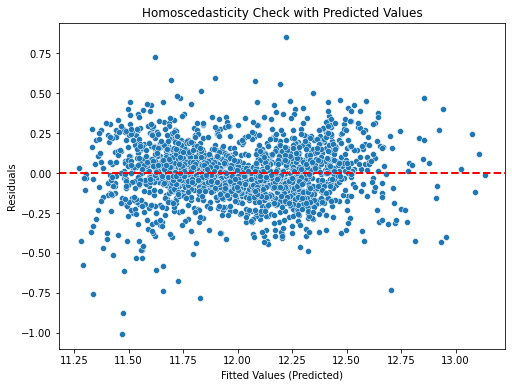

In [52]:
residuals = model.resid
fitted_values = model.fittedvalues

# Scatter plot of residuals vs. fitted values with predicted values
plt.figure(figsize=(8, 6))
sb.scatterplot(x=model.predict(), y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  
plt.xlabel('Fitted Values (Predicted)')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check with Predicted Values')
plt.show()

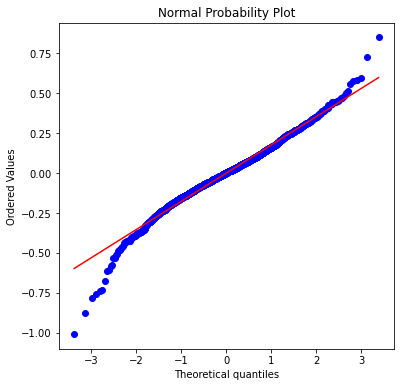

In [53]:
fig, ax = plt.subplots(figsize=(6, 6))
stats.probplot(residuals, plot=ax, fit=True)
plt.title('Normal Probability Plot')
plt.show()

# Model 4

In [54]:
df_new = df_dropped_columns.copy()

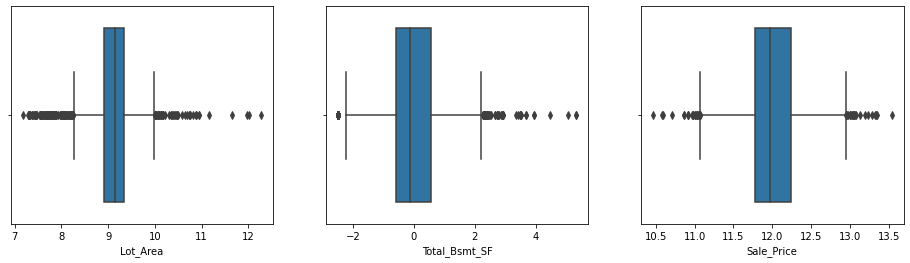

In [55]:
fig, ax2 = plt.subplots(1, 3, figsize=(16, 4))

sb.boxplot(x=df_new['Lot_Area'], ax=ax2[0])
sb.boxplot(x=df_new['Total_Bsmt_SF'], ax=ax2[1])
sb.boxplot(x=df_new['Sale_Price'], ax=ax2[2])
plt.show()



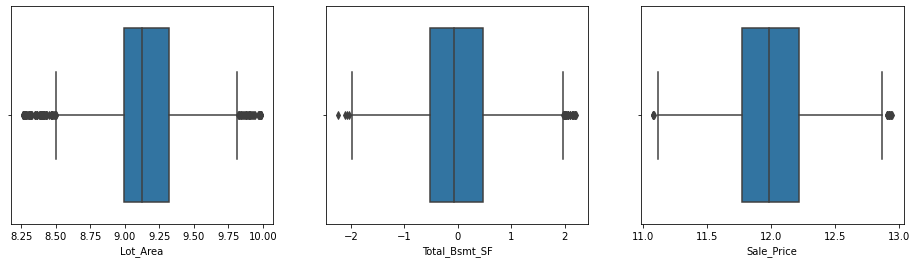

In [56]:
def handle_outlier(column):
    q1 = df_new[column].quantile(0.25)
    q3 = df_new[column].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    df_new.loc[(df_new[column] < low) | (df_new[column] > high), column] = df_new[column].mean()
     

handle_outlier('Lot_Area')
handle_outlier('Sale_Price')
handle_outlier('Total_Bsmt_SF')  

fig, ax2 = plt.subplots(1, 3, figsize=(16, 4))

sb.boxplot(x=df_new['Lot_Area'], ax=ax2[0])
sb.boxplot(x=df_new['Total_Bsmt_SF'], ax=ax2[1])
sb.boxplot(x=df_new['Sale_Price'], ax=ax2[2])
plt.show()

In [57]:
df_new = df_new.drop(["Longitude","Latitude"],axis=1)

X = df_new.drop("Sale_Price", axis=1)
y = df_new['Sale_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23136235)

X = sm.add_constant(X)

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Fit the OLS model on the training set
model = sm.OLS(y_train, X_train_const).fit()


# Print the summary
print(model.summary())

summary_html = model.summary().tables[1].as_html()

# Convert the HTML table to a DataFrame
summary_df = pd.read_html(summary_html, header=0, index_col=0)[0]

# Export the DataFrame to Excel
summary_df.to_excel('ols_summary_4.xlsx')

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     584.4
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        02:17:44   Log-Likelihood:                 446.43
No. Observations:                1930   AIC:                            -876.9
Df Residuals:                    1922   BIC:                            -832.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.0163      0.404      9.932

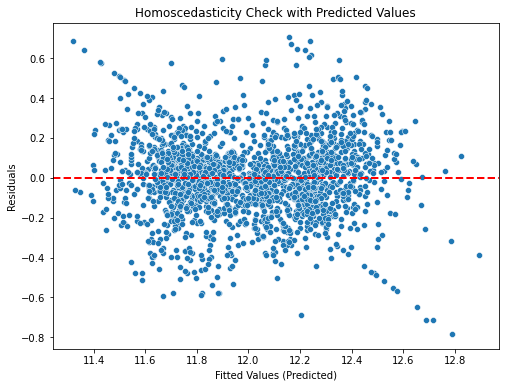

In [58]:
residuals = model.resid
fitted_values = model.fittedvalues

# Scatter plot of residuals vs. fitted values with predicted values
plt.figure(figsize=(8, 6))
sb.scatterplot(x=model.predict(), y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  
plt.xlabel('Fitted Values (Predicted)')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check with Predicted Values')
plt.savefig('Homoscedasticity_4.png')
plt.show()



In [59]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

vif_data.to_excel('vif_4.xlsx')

        Variable          VIF
0          const  8419.705597
1       Lot_Area     1.164697
2   Overall_Cond     1.189152
3     Year_Built     1.650094
4  Total_Bsmt_SF     1.509491
5      Full_Bath     1.345201
6      Half_Bath     1.304644
7     Fireplaces     1.203716


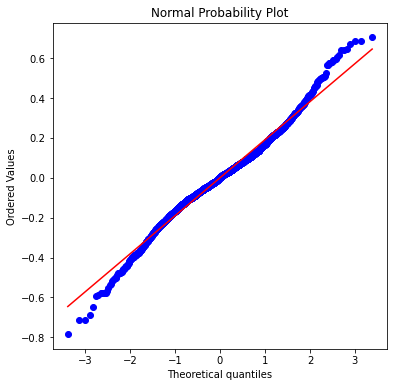

In [60]:
fig, ax = plt.subplots(figsize=(6, 6))
stats.probplot(residuals, plot=ax, fit=True)
plt.title('Normal Probability Plot')
plt.savefig('Normal Probability Plot _4.png')
plt.show()



In [61]:
# Cook's distance
influence = OLSInfluence(model)
cook_distance = influence.cooks_distance

print(f'Max Cook\'s Distance: {cook_distance[0].max()}')

Max Cook's Distance: 0.045697545167410064


# Model 5

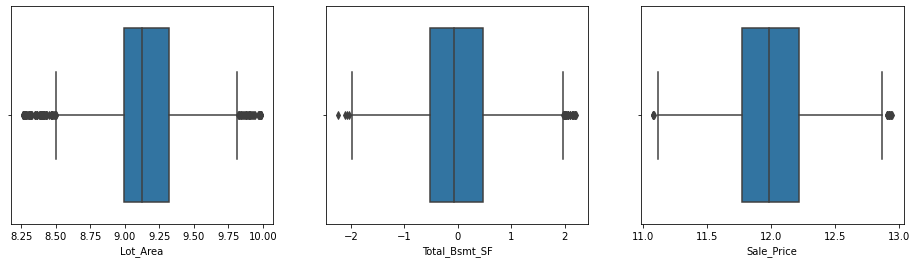

In [62]:
fig, ax2 = plt.subplots(1, 3, figsize=(16, 4))

sb.boxplot(x=df_new['Lot_Area'], ax=ax2[0])
sb.boxplot(x=df_new['Total_Bsmt_SF'], ax=ax2[1])
sb.boxplot(x=df_new['Sale_Price'], ax=ax2[2])
plt.show()


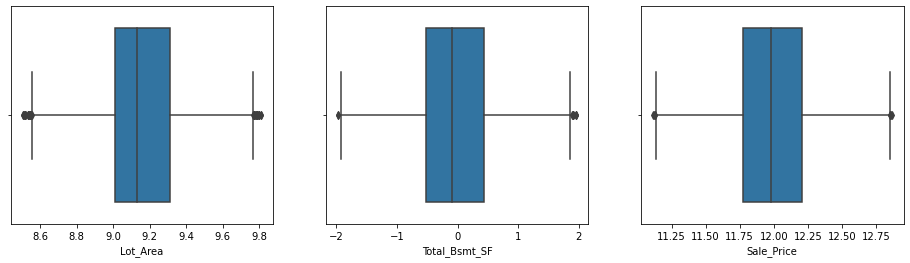

In [63]:
def handle_outlier(column):
    q1 = df_new[column].quantile(0.25)
    q3 = df_new[column].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    df_new.loc[(df_new[column] < low) | (df_new[column] > high), column] = np.nan
     

handle_outlier('Lot_Area')
handle_outlier('Sale_Price')
handle_outlier('Total_Bsmt_SF')

df_removed_outliers = df_new.dropna(axis = 0)

fig, ax2 = plt.subplots(1, 3, figsize=(16, 4))

sb.boxplot(x=df_removed_outliers['Lot_Area'], ax=ax2[0])
sb.boxplot(x=df_removed_outliers['Total_Bsmt_SF'], ax=ax2[1])
sb.boxplot(x=df_removed_outliers['Sale_Price'], ax=ax2[2])
plt.show()

In [64]:
df_newest = df_removed_outliers.drop(["Half_Bath"],axis=1)

X = df_newest.drop("Sale_Price", axis=1)
y = df_newest['Sale_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23136235)

X = sm.add_constant(X)

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Fit the OLS model on the training set
model = sm.OLS(y_train, X_train_const).fit()


# Print the summary
print(model.summary())

summary_html = model.summary().tables[1].as_html()

# Convert the HTML table to a DataFrame
summary_df = pd.read_html(summary_html, header=0, index_col=0)[0]

# Export the DataFrame to Excel
summary_df.to_excel('ols_summary_5.xlsx')

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     564.0
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        02:17:45   Log-Likelihood:                 402.06
No. Observations:                1799   AIC:                            -790.1
Df Residuals:                    1792   BIC:                            -751.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.4534      0.405      6.059

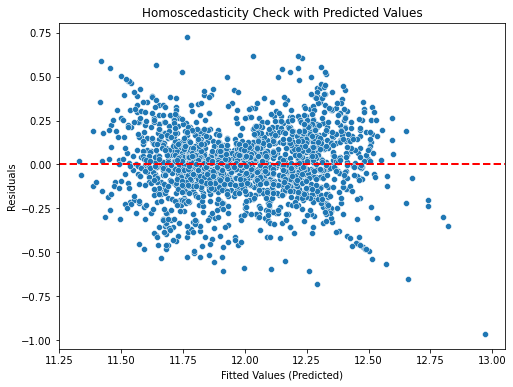

In [65]:
residuals = model.resid
fitted_values = model.fittedvalues

# Scatter plot of residuals vs. fitted values with predicted values
plt.figure(figsize=(8, 6))
sb.scatterplot(x=model.predict(), y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  
plt.xlabel('Fitted Values (Predicted)')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check with Predicted Values')
plt.savefig('Homoscedasticity Check with Predicted Values _5.png')
plt.show()

In [66]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data.to_excel('vif_5.xlsx')
print(vif_data)

        Variable          VIF
0          const  7662.964485
1       Lot_Area     1.154825
2   Overall_Cond     1.179097
3     Year_Built     1.524453
4  Total_Bsmt_SF     1.272242
5      Full_Bath     1.334453
6     Fireplaces     1.146185


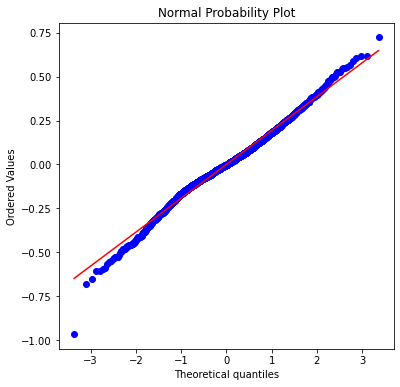

In [67]:
fig, ax = plt.subplots(figsize=(6, 6))
stats.probplot(residuals, plot=ax, fit=True)
plt.title('Normal Probability Plot')
plt.savefig('Normal Probability Plot _5.png')
plt.show()

In [68]:
# Cook's distance
influence = OLSInfluence(model)
cook_distance = influence.cooks_distance

print(f'Max Cook\'s Distance: {cook_distance[0].max()}')

Max Cook's Distance: 0.040550889419628804


# Test Data

In [69]:
y_pred = model.predict(X_test_const)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


Mean Squared Error (MSE): 0.04
Root Mean Squared Error (RMSE): 0.20


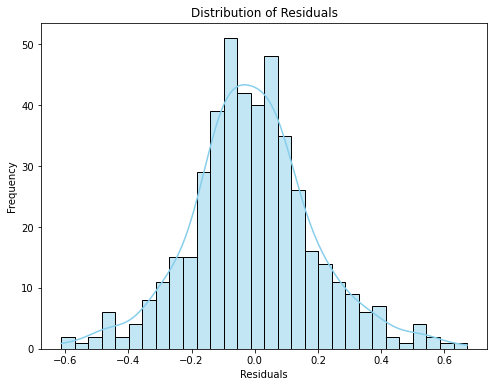

In [70]:
residuals = y_test - y_pred

# Create a distribution plot of residuals
plt.figure(figsize=(8, 6))
sb.histplot(residuals, kde=True, bins=30, color='skyblue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.savefig('result.png')
plt.show()